In [ ]:
RETAIL ANALYTICS AND CUSTOMER SEGMENTATION USING PYTHON

In [86]:
import pandas as pd

In [87]:
df = pd.read_csv('Customers.csv')
df = pd.read_csv('transactions.csv')
df = pd.read_csv('prod_cat_info.csv')

In [ ]:
1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to
keep all customers who have done transactions with us and select the join type accordingly.

In [110]:
import pandas as pd

customers = pd.read_csv("customers.csv", parse_dates=["dob"], dayfirst=True)
transactions = pd.read_csv("transactions.csv", parse_dates=["tran_date"], dayfirst=True)
prod_cat_info = pd.read_csv("prod_cat_info.csv")

customer_final = transactions.merge(customers, on="customer_id", how="inner")

customer_final = customer_final.merge(prod_cat_info, on=["prod_cat_code", "prod_sub_cat_code"], how="inner")

print("Final merged dataset shape:", customer_final.shape)
print(customer_final.head())


Final merged dataset shape: (23053, 15)
   transaction_id  customer_id  tran_date  prod_sub_cat_code  prod_cat_code  \
0     80712190438       270351 2014-02-28                  1              1   
1     29258453508       270384 2014-02-27                  5              3   
2     51750724947       273420 2014-02-24                  6              5   
3     93274880719       271509 2014-02-24                 11              6   
4     51750724947       273420 2014-02-23                  6              5   

   qty    rate     tax  total_amt store_type        dob gender  city_code  \
0   -5  -772.0  405.30   -4265.30     e-Shop 1981-09-26      M        5.0   
1   -5 -1497.0  785.93   -8270.93     e-Shop 1973-05-11      F        8.0   
2   -2  -791.0  166.11   -1748.11   TeleShop 1992-07-27      M        8.0   
3   -3 -1363.0  429.35   -4518.35     e-Shop 1981-06-08      M        3.0   
4   -2  -791.0  166.11   -1748.11   TeleShop 1992-07-27      M        8.0   

           prod_cat pr

In [ ]:
2. Prepare a summary report for the merged data set.
a. Get the column names and their corresponding data types.
b. Top/Bottom 10 observations.
c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max).
d. Frequency tables for all the categorical variables.

In [112]:
import pandas as pd

print("Column Names & Data Types:\n", customer_final.dtypes)

print("\nTop 10 Observations:\n", customer_final.head(10))
print("\nBottom 10 Observations:\n", customer_final.tail(10))

continuous_vars = ["qty", "rate", "tax", "total_amt"]
summary_report = customer_final[continuous_vars].describe(percentiles=[0.25, 0.5, 0.75])
print("\nFive-Number Summary:\n", summary_report.loc[["min", "25%", "50%", "75%", "max"]])

categorical_vars = ["gender", "city_code", "store_type", "prod_cat", "prod_subcat"]
for var in categorical_vars:
    print(f"\nFrequency Table for {var}:\n", customer_final[var].value_counts())


Column Names & Data Types:
 transaction_id                int64
customer_id                   int64
tran_date            datetime64[ns]
prod_sub_cat_code             int64
prod_cat_code                 int64
qty                           int64
rate                        float64
tax                         float64
total_amt                   float64
store_type                   object
dob                  datetime64[ns]
gender                       object
city_code                   float64
prod_cat                     object
prod_subcat                  object
dtype: object

Top 10 Observations:
    transaction_id  customer_id  tran_date  prod_sub_cat_code  prod_cat_code  \
0     80712190438       270351 2014-02-28                  1              1   
1     29258453508       270384 2014-02-27                  5              3   
2     51750724947       273420 2014-02-24                  6              5   
3     93274880719       271509 2014-02-24                 11              6   


In [ ]:
3. Generate histograms for all continuous variables and frequency bars for categorical variables.

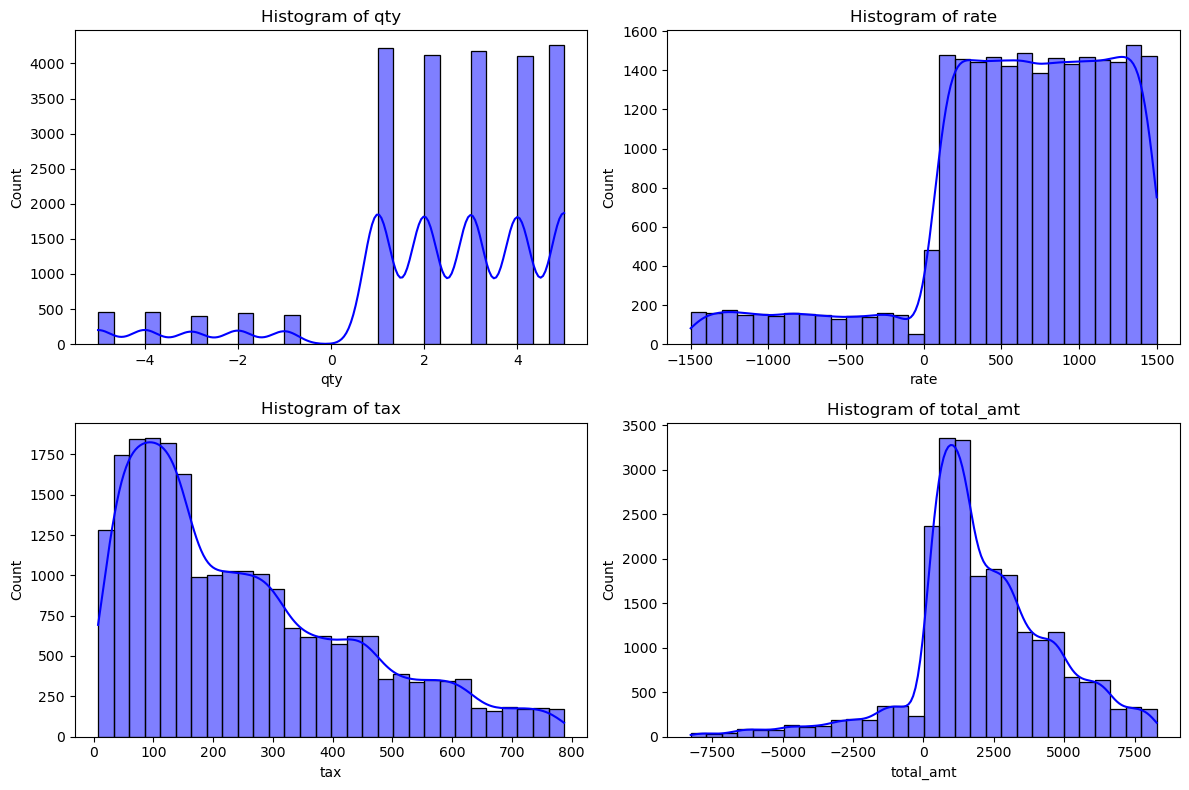

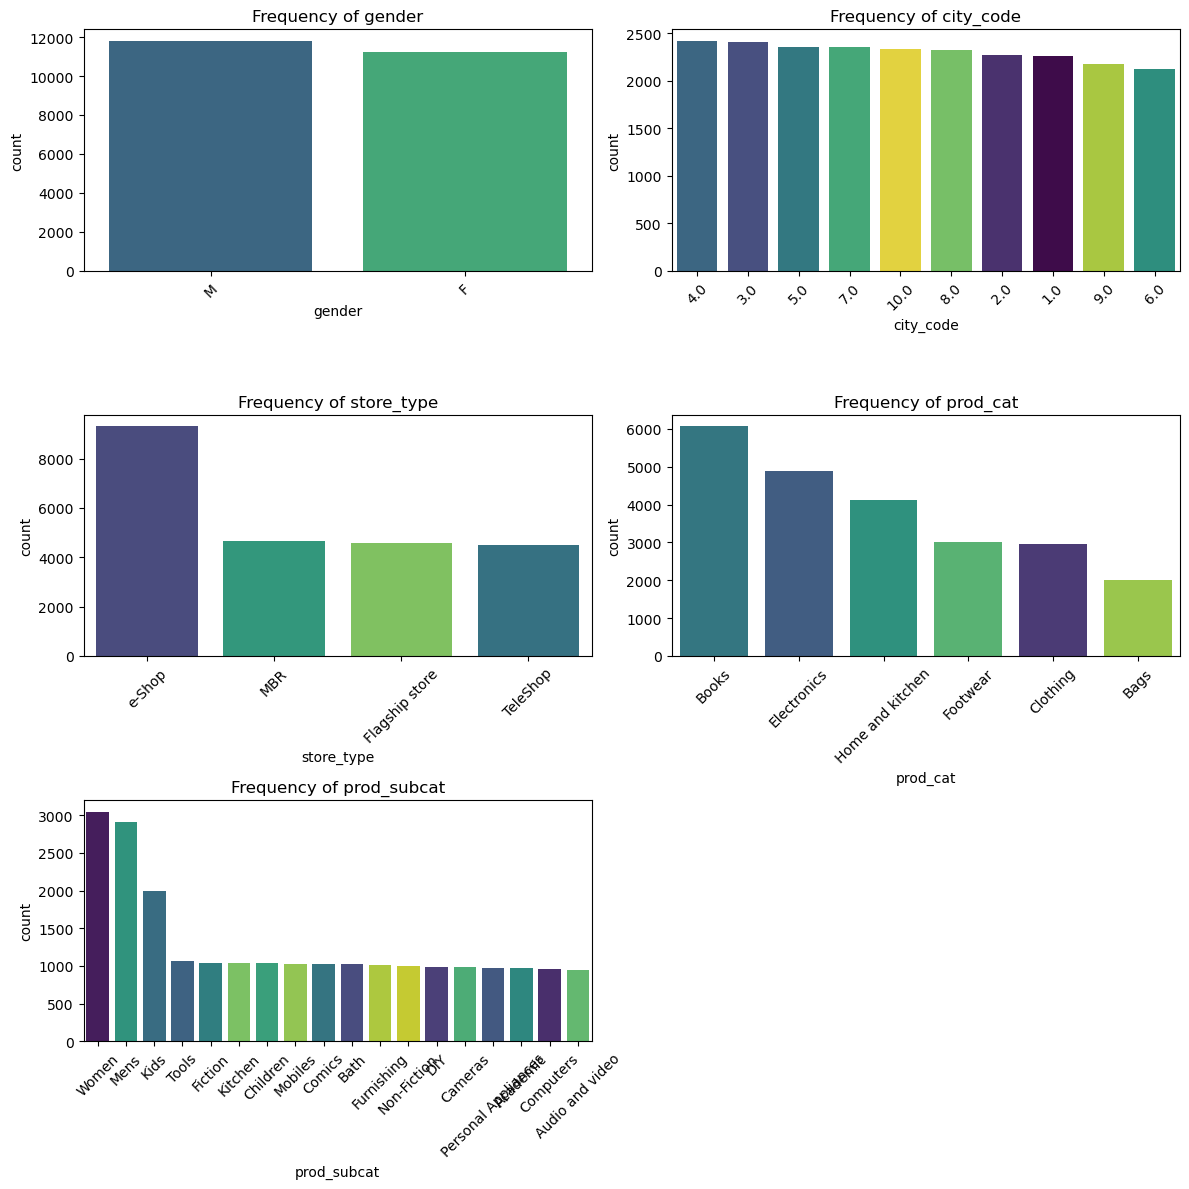

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

continuous_vars = ["qty", "rate", "tax", "total_amt"]
plt.figure(figsize=(12, 8))
for i, col in enumerate(continuous_vars, 1):
    plt.subplot(2, 2, i)
    sns.histplot(customer_final[col], bins=30, kde=True, color='blue')
    plt.title(f"Histogram of {col}")
plt.tight_layout()
plt.show()

categorical_vars = ["gender", "city_code", "store_type", "prod_cat", "prod_subcat"]
plt.figure(figsize=(12, 12))
for i, col in enumerate(categorical_vars, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=customer_final[col], hue=customer_final[col], legend=False, palette="viridis",
                  order=customer_final[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"Frequency of {col}")
plt.tight_layout()
plt.show()


In [ ]:
4. Calculate the following information using the merged dataset:
a. Time period of the available transaction data.
b. Count of transactions where the total amount of transaction was negative.

In [115]:
import pandas as pd

customer_final["tran_date"] = pd.to_datetime(customer_final["tran_date"], errors='coerce')

min_date = customer_final["tran_date"].min()
max_date = customer_final["tran_date"].max()

print(f"Transaction Date Range: {min_date} to {max_date}")

negative_transactions_count = customer_final[customer_final["total_amt"] < 0].shape[0]

print(f"Number of Transactions with Negative Total Amount: {negative_transactions_count}")


Transaction Date Range: 2011-01-25 00:00:00 to 2014-02-28 00:00:00
Number of Transactions with Negative Total Amount: 2177


In [ ]:
5. Analyze which product categories are more popular among females vs male customers.

   gender          prod_cat  transaction_id
1       F             Books            2949
3       F       Electronics            2328
5       F  Home and kitchen            1994
4       F          Footwear            1529
2       F          Clothing            1439
0       F              Bags             994
7       M             Books            3116
9       M       Electronics            2570
11      M  Home and kitchen            2134
8       M          Clothing            1518
10      M          Footwear            1469
6       M              Bags            1004
12    nan             Books               4
13    nan          Clothing               3
14    nan          Footwear               1
15    nan  Home and kitchen               1


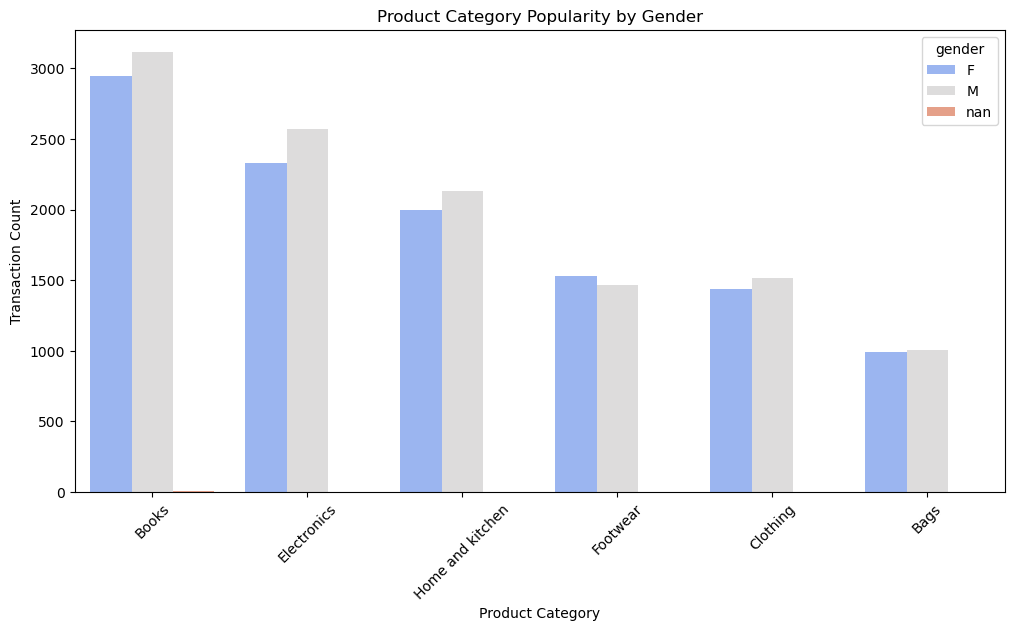

In [116]:
import pandas as pd

customer_final["gender"] = customer_final["gender"].astype(str)
customer_final["prod_cat"] = customer_final["prod_cat"].astype(str)

popular_products_by_gender = customer_final.groupby(["gender", "prod_cat"])["transaction_id"].count().reset_index()

popular_products_by_gender = popular_products_by_gender.sort_values(by=["gender", "transaction_id"], ascending=[True, False])

print(popular_products_by_gender)

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.barplot(x="prod_cat", y="transaction_id", hue="gender", data=popular_products_by_gender, palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Product Category")
plt.ylabel("Transaction Count")
plt.title("Product Category Popularity by Gender")
plt.show()


In [ ]:
6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [119]:
import pandas as pd

city_counts = customer_final["city_code"].value_counts()

max_city = city_counts.idxmax()
max_customers = city_counts.max()

total_customers = city_counts.sum()
percentage = (max_customers / total_customers) * 100

print(f"City code with the maximum customers: {max_city}")
print(f"Number of customers: {max_customers}")
print(f"Percentage of total customers: {percentage:.2f}%")


City code with the maximum customers: 4.0
Number of customers: 2422
Percentage of total customers: 10.51%


In [ ]:
7. Which store type sells the maximum products by value and by quantity?

In [120]:
import pandas as pd

store_sales = customer_final.groupby("store_type").agg({"total_amt": "sum", "qty": "sum"})

max_value_store = store_sales["total_amt"].idxmax()
max_value = store_sales["total_amt"].max()

max_qty_store = store_sales["qty"].idxmax()
max_qty = store_sales["qty"].max()

print(f"Store type with maximum sales by value: {max_value_store} (₹{max_value:,.2f})")
print(f"Store type with maximum sales by quantity: {max_qty_store} ({max_qty} units)")


Store type with maximum sales by value: e-Shop (₹19,824,827.64)
Store type with maximum sales by quantity: e-Shop (22763 units)


In [ ]:
8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [121]:
import pandas as pd

filtered_data = customer_final[
    (customer_final["store_type"] == "Flagship store") &
    (customer_final["prod_cat"].isin(["Electronics", "Clothing"]))
]

total_earned = filtered_data["total_amt"].sum()

print(f"Total amount earned from Electronics & Clothing in Flagship Stores: ₹{total_earned:,.2f}")


Total amount earned from Electronics & Clothing in Flagship Stores: ₹3,409,561.25


In [ ]:
9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [122]:
import pandas as pd

filtered_data = customer_final[
    (customer_final["gender"] == "M") & 
    (customer_final["prod_cat"] == "Electronics")
]

total_earned_male_electronics = filtered_data["total_amt"].sum()

print(f"Total amount earned from Male customers in Electronics: ₹{total_earned_male_electronics:,.2f}")


Total amount earned from Male customers in Electronics: ₹5,703,112.63


In [ ]:
10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [124]:
import pandas as pd

filtered_data = customer_final[customer_final["total_amt"] > 0]

customer_transaction_counts = filtered_data.groupby("customer_id")["transaction_id"].nunique()

customers_more_than_10 = (customer_transaction_counts > 10).sum()

print(f"Number of customers with more than 10 unique transactions: {customers_more_than_10}")


Number of customers with more than 10 unique transactions: 6


In [ ]:
11. For all customers aged between 25 - 35, find out:
a. What was the total amount spent for “Electronics” and “Books” product categories?
b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [125]:
import pandas as pd

customer_final["dob"] = pd.to_datetime(customer_final["dob"], errors="coerce")

reference_date = pd.Timestamp("2014-12-31")
customer_final["age"] = (reference_date - customer_final["dob"]).dt.days // 365

customers_25_35 = customer_final[(customer_final["age"] >= 25) & (customer_final["age"] <= 35)].copy()

customers_25_35.loc[:, "tran_date"] = pd.to_datetime(customers_25_35["tran_date"], errors="coerce")

total_spent_elec_books = customers_25_35[
    customers_25_35["prod_cat"].isin(["Electronics", "Books"])
]["total_amt"].sum()

date_filtered_spent = customers_25_35[
    (customers_25_35["tran_date"] >= "2014-01-01") & (customers_25_35["tran_date"] <= "2014-03-01")
]["total_amt"].sum()

print(f"Total amount spent on Electronics & Books: {total_spent_elec_books}")
print(f"Total amount spent between 1st Jan 2014 - 1st Mar 2014: {date_filtered_spent}")


Total amount spent on Electronics & Books: 11362484.96
Total amount spent between 1st Jan 2014 - 1st Mar 2014: 1106716.68
